In [ ]:
import pandas as pd

# Load datasets
ice_df = pd.read_excel("/content/greenland-and-antarctica-ice-sheet-mass-copy.xlsx")
sealevel_df = pd.read_excel("/content/sealevel.xlsx")
ch4_df = pd.read_excel("/content/ch4.xlsx")  # Use read_excel if it's an Excel file
co2_df = pd.read_excel("/content/co2.xlsx")  # Use read_excel if it's an Excel file

# Print the first few rows of each to understand structure
print("Ice Sheet Dataset:\n", ice_df.head(), "\n")
print("Sea Level Dataset:\n", sealevel_df.head(), "\n")
print("CH4 Dataset:\n", ch4_df.head(), "\n")
print("CO2 Dataset:\n", co2_df.head(), "\n")

# Print column names to check for mismatches
print("Ice Sheet Columns:", ice_df.columns)
print("Sea Level Columns:", sealevel_df.columns)
print("CH4 Columns:", ch4_df.columns)
print("CO2 Columns:", co2_df.columns)


Ice Sheet Dataset:
       Year  Greenland Ice Mass Variation (Gt)  \
0  2002.29                               0.00   
1  2002.35                              68.44   
2  2002.62                            -220.42   
3  2002.71                            -241.73   
4  2002.79                            -209.72   

   Greenland Uncertainty  (+/- Gt)  Antartica  Ice Mass Variation (Gt)  \
0                           134.28                                0.00   
1                            70.59                               18.97   
2                            53.36                              -59.44   
3                            64.95                               44.20   
4                            39.05                               62.79   

   Antarctica Uncertainty (+/- Gt)  
0                           178.90  
1                           102.47  
2                            83.09  
3                            97.19  
4                            61.82   

Sea Level Datase

In [ ]:
# Rename columns for easier merging
sealevel_df.rename(columns={"year+fraction of year (mid-cycle)": "Year"}, inplace=True)
ch4_df.rename(columns={"decimal": "Year"}, inplace=True)
co2_df.rename(columns={"decimal date": "Year"}, inplace=True)

# Round years to match the Ice Sheet dataset format
sealevel_df["Year"] = sealevel_df["Year"].round(2)  # Keep fractional part for accuracy
ch4_df["Year"] = ch4_df["Year"].round(2)
co2_df["Year"] = co2_df["Year"].round(2)

# Display cleaned column names
print("Cleaned Column Names:")
print("Sea Level:", sealevel_df.columns)
print("CH4:", ch4_df.columns)
print("CO2:", co2_df.columns)

Cleaned Column Names:
Sea Level: Index(['altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1) ',
       'merged file cycle', 'Year', 'number of observations ',
       'number of weighted observations ', 'GMSL',
       'standard deviation of GMSL', 'smoothed', 'GMSL GIA',
       'standard deviation of GMSL (GIA applied)', 'smoothed2', 'smoothed3',
       'smoothed4'],
      dtype='object')
CH4: Index(['year', 'month', 'Year', 'average', 'average_unc', 'trend',
       'trend_unc'],
      dtype='object')
CO2: Index(['Column1', 'Column2', 'Year', 'monthly average', 'de season alized',
       'days', 'st.dev of days', 'unc. Of mon mean'],
      dtype='object')


In [ ]:
# Merge with Sea Level dataset
merged_df = ice_df.merge(sealevel_df, on="Year", how="left")

# Merge with CH4 dataset
merged_df = merged_df.merge(ch4_df, on="Year", how="left")

# Merge with CO2 dataset
merged_df = merged_df.merge(co2_df, on="Year", how="left")

# Check the merged dataset
print("Final Merged Dataset Shape:", merged_df.shape)
print(merged_df.head())

Final Merged Dataset Shape: (213, 30)
      Year  Greenland Ice Mass Variation (Gt)  \
0  2002.29                               0.00   
1  2002.35                              68.44   
2  2002.62                            -220.42   
3  2002.71                            -241.73   
4  2002.79                            -209.72   

   Greenland Uncertainty  (+/- Gt)  Antartica  Ice Mass Variation (Gt)  \
0                           134.28                                0.00   
1                            70.59                               18.97   
2                            53.36                              -59.44   
3                            64.95                               44.20   
4                            39.05                               62.79   

   Antarctica Uncertainty (+/- Gt)  \
0                           178.90   
1                           102.47   
2                            83.09   
3                            97.19   
4                            61.

In [ ]:
# Fill missing values using interpolation
merged_df.interpolate(method='linear', inplace=True)

# Fill remaining NaN values using forward fill
merged_df.fillna(method='ffill', inplace=True)

print("Missing Values Count After Cleaning:\n", merged_df.isnull().sum())

Missing Values Count After Cleaning:
 Year                                                                      0
Greenland Ice Mass Variation (Gt)                                         0
Greenland Uncertainty  (+/- Gt)                                           0
Antartica  Ice Mass Variation (Gt)                                        0
Antarctica Uncertainty (+/- Gt)                                           0
altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)     1
merged file cycle                                                         1
number of observations                                                    1
number of weighted observations                                           1
GMSL                                                                      1
standard deviation of GMSL                                                1
smoothed                                                                  1
GMSL GIA                                          

<ipython-input-4-1067e43754e1>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


In [ ]:
# Backward fill the remaining NaN values
merged_df.fillna(method='bfill', inplace=True)

# Check again
print("Final Missing Values Count:\n", merged_df.isnull().sum())
print(merged_df.columns)

Final Missing Values Count:
 Year                                                                      0
Greenland Ice Mass Variation (Gt)                                         0
Greenland Uncertainty  (+/- Gt)                                           0
Antartica  Ice Mass Variation (Gt)                                        0
Antarctica Uncertainty (+/- Gt)                                           0
altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)     0
merged file cycle                                                         0
number of observations                                                    0
number of weighted observations                                           0
GMSL                                                                      0
standard deviation of GMSL                                                0
smoothed                                                                  0
GMSL GIA                                                   

<ipython-input-5-6bde6af63f22>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill', inplace=True)


In [ ]:
import numpy as np
temp_df = pd.read_csv("/content/gmt_GISTEMP.csv")  # Temperature data

import pandas as pd

# Expand the temperature dataset for all 12 months per year
expanded_temp_df = temp_df.loc[temp_df.index.repeat(12)].reset_index(drop=True)

# Assign month numbers (1-12) correctly
expanded_temp_df["Month"] = np.tile(np.arange(1, 13), len(temp_df))


# Ensure 'Year' is integer and extract 'Month' if it's in decimal format
merged_df["Month"] = ((merged_df["Year"] % 1) * 12 + 1).astype(int)  # Convert fractional year to month
merged_df["Year"] = merged_df["Year"].astype(int)  # Convert year to integer

# Check again:
print(merged_df[["Year", "Month"]].head())

merged_df = merged_df.merge(expanded_temp_df, on=["Year", "Month"], how="left")


   Year  Month
0  2002      4
1  2002      5
2  2002      8
3  2002      9
4  2002     10


In [ ]:
print(merged_df.isna().sum())

Year                                                                      0
Greenland Ice Mass Variation (Gt)                                         0
Greenland Uncertainty  (+/- Gt)                                           0
Antartica  Ice Mass Variation (Gt)                                        0
Antarctica Uncertainty (+/- Gt)                                           0
altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)     0
merged file cycle                                                         0
number of observations                                                    0
number of weighted observations                                           0
GMSL                                                                      0
standard deviation of GMSL                                                0
smoothed                                                                  0
GMSL GIA                                                                  0
standard dev

In [ ]:
print(merged_df.head())

columns_to_drop = [
    "altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1) ",
    "merged file cycle",
    "number of observations ",
    "number of weighted observations ",
    "Column1", "Column2",
    "monthly average",
    "GMSL GIA",
    "standard deviation of GMSL (GIA applied)",
     "smoothed2", "smoothed3",
    "smoothed4",
    "st.dev of days",
    "GISTEMP uncertainty",
    "unc. Of mon mean",  # Fixed missing comma
    "month",  # Keep only "Month"
    "trend_unc",  # If "trend" is enough
    "average_unc",  # Drop if not needed
    "days",
    "Month",
    "year",
]

merged_df.drop(columns=columns_to_drop, errors="ignore", inplace=True)

# Check the new structure
print(merged_df.head())

df_trend = merged_df.copy()


   Year  Greenland Ice Mass Variation (Gt)  Greenland Uncertainty  (+/- Gt)  \
0  2002                               0.00                           134.28   
1  2002                              68.44                            70.59   
2  2002                            -220.42                            53.36   
3  2002                            -241.73                            64.95   
4  2002                            -209.72                            39.05   

   Antartica  Ice Mass Variation (Gt)  Antarctica Uncertainty (+/- Gt)  \
0                                0.00                           178.90   
1                               18.97                           102.47   
2                              -59.44                            83.09   
3                               44.20                            97.19   
4                               62.79                            61.82   

   altimeter type 0=dual-frequency  999=single frequency (ie Poseidon-1)   \
0  

In [ ]:
print(merged_df.isnull().sum())

Year                                  0
Greenland Ice Mass Variation (Gt)     0
Greenland Uncertainty  (+/- Gt)       0
Antartica  Ice Mass Variation (Gt)    0
Antarctica Uncertainty (+/- Gt)       0
GMSL                                  0
standard deviation of GMSL            0
smoothed                              0
average                               0
trend                                 0
de season alized                      0
GISTEMP (degC)                        0
dtype: int64


In [ ]:
merged_df["Greenland_Ice_Change"] = merged_df["Greenland Ice Mass Variation (Gt)"].diff()
merged_df["Antarctica_Ice_Change"] = merged_df["Antartica  Ice Mass Variation (Gt)"].diff()

In [ ]:
merged_df["GMSL_MA_3"] = merged_df["GMSL"].rolling(window=3).mean()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(merged_df.select_dtypes(include=['float64', 'int64']))
merged_df[merged_df.select_dtypes(include=['float64', 'int64']).columns] = scaled_features

In [ ]:
correlation_matrix = merged_df.corr()
print(correlation_matrix)

                                        Year  \
Year                                1.000000   
Greenland Ice Mass Variation (Gt)  -0.991108   
Greenland Uncertainty  (+/- Gt)    -0.261148   
Antartica  Ice Mass Variation (Gt) -0.979681   
Antarctica Uncertainty (+/- Gt)    -0.355229   
GMSL                                0.968838   
standard deviation of GMSL          0.150181   
smoothed                            0.972934   
average                             0.961610   
trend                               0.967583   
de season alized                    0.997160   
GISTEMP (degC)                      0.840066   
Greenland_Ice_Change               -0.010445   
Antarctica_Ice_Change              -0.003243   
GMSL_MA_3                           0.971678   

                                    Greenland Ice Mass Variation (Gt)  \
Year                                                        -0.991108   
Greenland Ice Mass Variation (Gt)                            1.000000   
Greenland Un

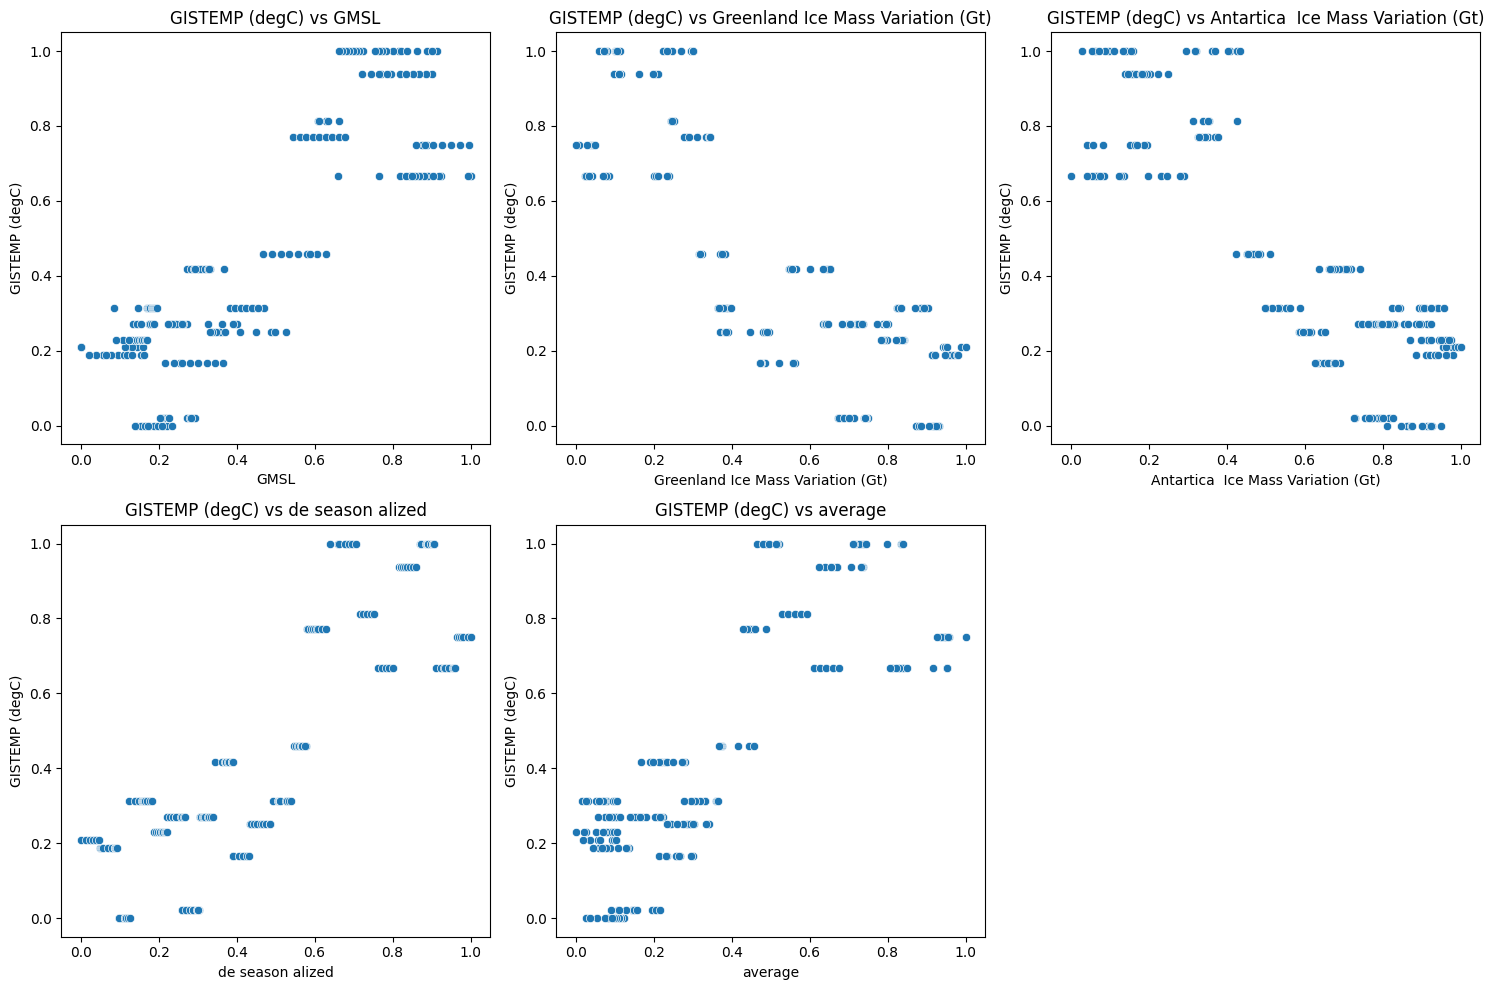

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a Pandas DataFrame named df
# Replace column names accordingly

features = ['GMSL', 'Greenland Ice Mass Variation (Gt)', 'Antartica  Ice Mass Variation (Gt)', 'de season alized', 'average']
target = 'GISTEMP (degC)'

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=merged_df[feature], y=merged_df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{target} vs {feature}')

plt.tight_layout()
plt.show()


X shape: (203, 10, 10), y shape: (203,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.2711 - mae: 0.4085 - val_loss: 0.0345 - val_mae: 0.1453
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0521 - mae: 0.1888 - val_loss: 0.0410 - val_mae: 0.1587
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0296 - mae: 0.1367 - val_loss: 0.0294 - val_mae: 0.1365
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0267 - mae: 0.1315 - val_loss: 0.0332 - val_mae: 0.1411
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0327 - mae: 0.1465 - val_loss: 0.0247 - val_mae: 0.1186
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0255 - mae: 0.1268 - val_loss: 0.0283 - val_mae: 0.1300
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0288 - mae: 0.1367 - val_loss: 0.0251 - val_mae: 0.1223
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0228 - mae: 0.1269 - val_loss: 0.0352 - val_mae: 0.1536
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0236 - mae: 0.1226 - 

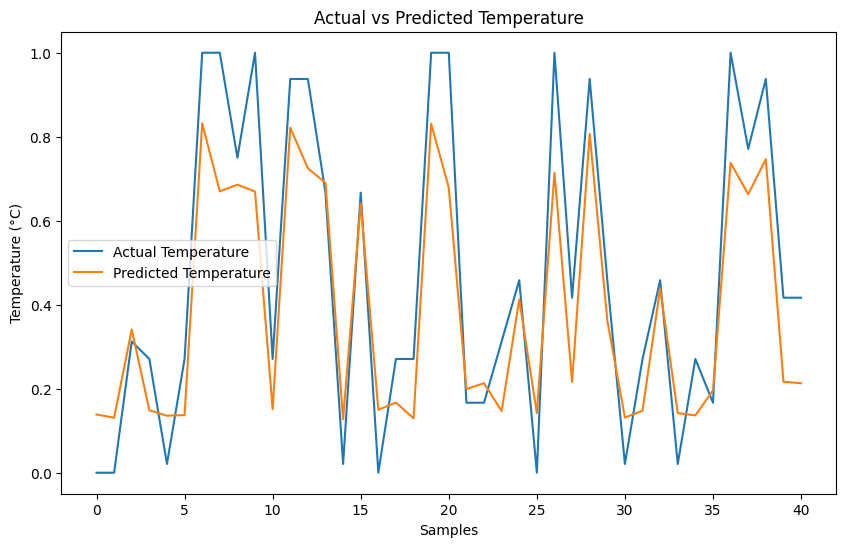

Root Mean Squared Error (RMSE): 0.16115763633372235
R^2 Score: 0.8024243067787472


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
df = merged_df

# Select Features & Target
features = [
    'Greenland Ice Mass Variation (Gt)', 'Greenland Uncertainty  (+/- Gt)',
    'Antartica  Ice Mass Variation (Gt)', 'Antarctica Uncertainty (+/- Gt)',
    'GMSL', 'standard deviation of GMSL', 'smoothed',  'average', 'trend',
    'de season alized'
]
target = 'GISTEMP (degC)'


# Scale Features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

# Create Sequences for Time Series
def create_sequences(data, labels, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_features, df[target].values, time_steps)

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X shape: {X.shape}, y shape: {y.shape}")  # Debug shapes

# Build CNN Model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),s
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output: Predicted Temperature
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Predict and Plot Results
y_pred = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

In [ ]:
def plot_actual_temperature_trend(start_year, end_year):
    # Filter raw data for the given year range
    filtered_df = df_trend[(df_trend['Year'] >= start_year) & (df_trend['Year'] <= end_year)]

    if filtered_df.empty:
        print(f"No data available between {start_year} and {end_year}.")
        return

    print(f"Filtered data from {start_year} to {end_year}: {len(filtered_df)} rows")

    # Plot the actual temperature for the selected years
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_df['Year'], filtered_df['GISTEMP (degC)'], marker='o', linestyle='-', color='orange', label='Actual Temperature')

    plt.title(f'Actual Temperature Trend from {start_year} to {end_year}')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()




Filtered data from 2004 to 2007: 48 rows


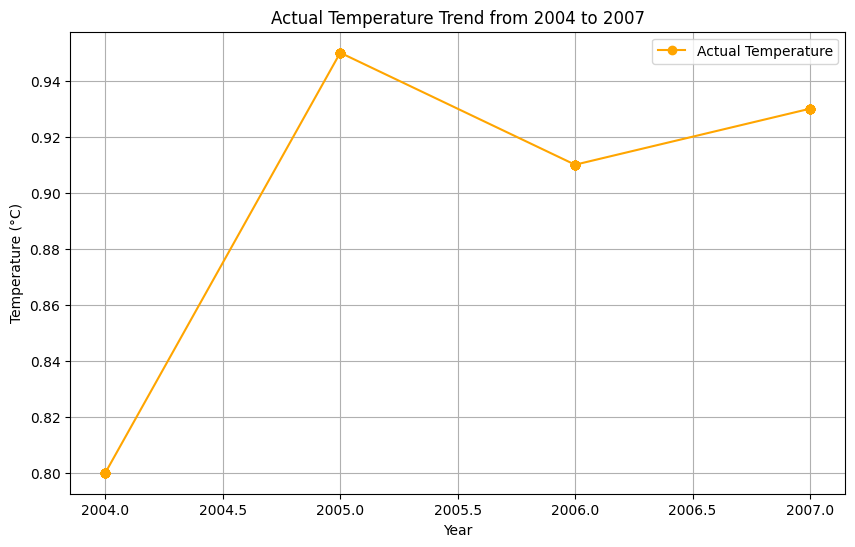

In [ ]:
# Example usage
plot_actual_temperature_trend(2004, 2007)

In [ ]:
def predict_future_years(start_year, num_years):
    # Copy merged_df to avoid modifying original
    future_df = merged_df.copy()

    # Get the last time_steps rows to start prediction
    recent_data = future_df[features].tail(time_steps).values

    # Scale recent data
    scaled_recent = scaler.transform(recent_data)

    predictions = []
    years = []

    for i in range(num_years):
        # Reshape input for model: (1, time_steps, features)
        input_seq = scaled_recent.reshape(1, time_steps, len(features))

        # Predict temperature (in °C)
        predicted_temp = model.predict(input_seq, verbose=0)[0][0]
        predictions.append(predicted_temp)

        # Assume features stay the same — append dummy or last row
        # Option 1: use last row again
        next_features_scaled = scaled_recent[-1].reshape(1, -1)

        # Stack new row, shift sequence window
        scaled_recent = np.vstack([scaled_recent[1:], next_features_scaled])

        # Add corresponding year
        years.append(start_year + i)

    # Plot predictions
    plt.figure(figsize=(10,6))
    plt.plot(years, predictions, marker='o', label='Predicted Future Temperature')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Predicted Temperature from {start_year} to {start_year + num_years - 1}')
    plt.legend()
    plt.show()

    # Output as DataFrame
    future_pred_df = pd.DataFrame({'Year': years, 'Predicted Temperature (°C)': predictions})
    return future_pred_df


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


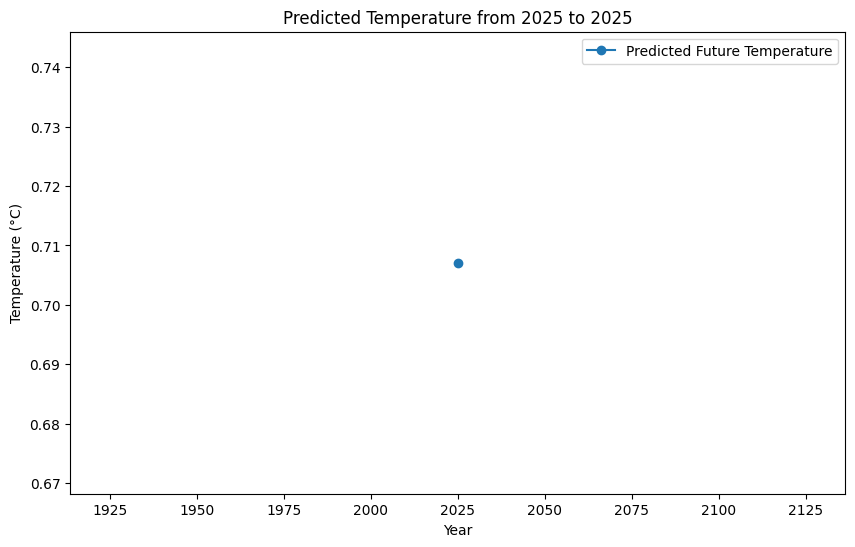

   Year  Predicted Temperature (°C)
0  2025                    0.707094


In [ ]:
future_predictions = predict_future_years(2025, 1)  # Predict 2023–2032
print(future_predictions)


X shape: (203, 10, 10), y shape: (203,)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.1461 - mae: 0.2927 - val_loss: 0.0768 - val_mae: 0.2417
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0539 - mae: 0.1879 - val_loss: 0.0219 - val_mae: 0.1242
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0330 - mae: 0.1528 - val_loss: 0.0258 - val_mae: 0.1367
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0264 - mae: 0.1265 - val_loss: 0.0190 - val_mae: 0.1214
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0246 - mae: 0.1314 - val_loss: 0.0173 - val_mae: 0.1173
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0244 - mae: 0.1297 - val_loss: 0.0188 - val_mae: 0.1244
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0264 - mae: 0.1380 - val_loss: 0.0200 - val_mae: 0.1252
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0236 - mae: 0.1265 - val_loss: 0.0185 - val_mae: 0.1214
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0227 - mae: 0.1251 - val_loss: 0

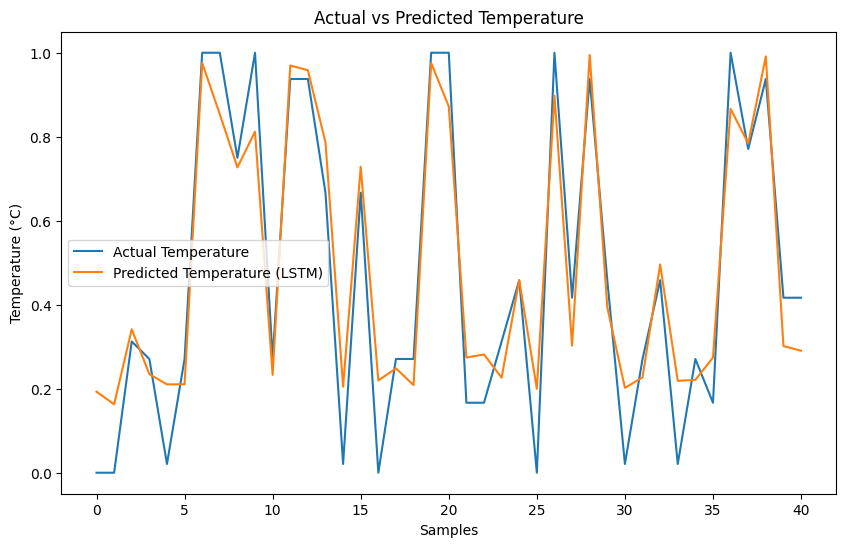

Root Mean Squared Error (RMSE): 0.11373729739860473
R² Score: 0.9015903821938708


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
df = merged_df.copy()

# Select Features & Target
features = [
    'Greenland Ice Mass Variation (Gt)', 'Greenland Uncertainty  (+/- Gt)',
    'Antartica  Ice Mass Variation (Gt)', 'Antarctica Uncertainty (+/- Gt)',
    'GMSL', 'standard deviation of GMSL', 'smoothed', 'average', 'trend',
    'de season alized'
]
target = 'GISTEMP (degC)'

# Scale Features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

# Create Sequences for Time Series
def create_sequences(data, labels, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_features, df[target].values, time_steps)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X shape: {X.shape}, y shape: {y.shape}")  # Debug shape

# Build LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model with EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Predict
y_pred = model.predict(X_test)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Temperature')
plt.plot(y_pred, label='Predicted Temperature (LSTM)')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Samples')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')